### Assignment 2
12200056

<b>1/ You have been hired as a consultant to a major Automotive Manufacturer and you have been taskedto develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). Download the data from [https://drive.google.com/file/d/1Y0llwlfLsF0EGP2ClFKMNrq4coStGdj/view?usp=sharing]. Construct a model to predict the fuel economybased on vehicle Horse Power using simple linear regression. Check the accuracy of the model prediction and explain the result.</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('FuelEconomy.csv')
df.head()

Horse Power  Fuel Economy (MPG)
0   118.770799           29.344195
1   176.326567           24.695934
2   219.262465           23.952010
3   187.310009           23.384546
4   218.594340           23.426739

In [2]:
#Split the datas into train and test data
y = df['Fuel Economy (MPG)'] 
X = df['Horse Power']
X_train,X_test,y_train,y_test = train_test_split(pd.DataFrame(X),y,test_size=0.2,random_state=10)

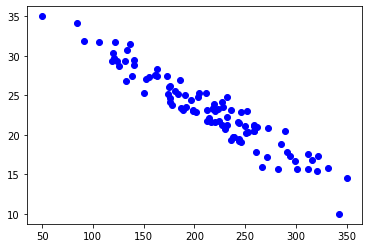

In [3]:
#Visualize the data using scatter plot

plt.scatter(X,y,color = 'blue')
plt.show()

Then, we fit the model using the sklearn linear regression module.

In [4]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

After that, we test the model on the test data.<br>
Lets check the accuracy score

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = LR.predict(X_test)
MSE = mean_squared_error(y_true = y_test, y_pred = y_pred)
print('The MSE value: ', MSE)

The MSE value:  2.1472419104058376


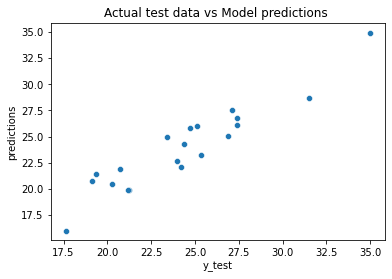

In [7]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_pred);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

In [8]:
dict = {'predicted_Fuel_Economy': y_pred}
df2 = pd.DataFrame(dict)
df2.head()

predicted_Fuel_Economy
0               28.686741
1               23.246122
2               25.099204
3               34.912464
4               20.805753

In [9]:
df['Fuel Economy (MPG)'] .head()

0    29.344195
1    24.695934
2    23.952010
3    23.384546
4    23.426739
Name: Fuel Economy (MPG), dtype: float64

In [10]:
print(f"The predicted value for the Fuel_Economy is: \n{df2.predicted_Fuel_Economy.head()}")

The predicted value for the Fuel_Economy is: 
0    28.686741
1    23.246122
2    25.099204
3    34.912464
4    20.805753
Name: predicted_Fuel_Economy, dtype: float64


### Result
In linear regression model the accuracy is checked by using the mean squared error(MSE).<br>
Lower the MSE better the model which means if the MSE we get is lower or closer to zero then the model we trained is more accurate.<br>
So here the model i trained has MSE value 2 which is close to zero, so I conclude that the model we trained for predicting the fuel economy based vehicle horse power was accurate and good.

<b>2/ 
Construct a regression model to predict the probability of being accepted for Graduate school. Download the dataset from [www.kaggle.com/mohansacharya/graduate-admissions]. Check the accuracy
of the model prediction and explain the result.

The dataset contains the following parameters:<br>
• GRE Scores (out of 340)<br>
• TOEFL Scores (out of 120)<br>
• University Rating (out of 5)<br>
• Statement of Purpose and Letter of Recommendation Strength (out of 5)<br>
• Undergraduate GPA (out of 10)<br>
• Research Experience (either 0 or 1)<br>
• Chance of Admit (ranging from 0 to 1)<br><b>

## working with  Multiple Linear Regression

In [11]:
admission = pd.read_csv('Admission_Predict.csv')
admission.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [12]:
admission.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

As we can see that all the features in <b>admission</b> dataframe we have the numeric so, we do not have to handle the categorical variables

# Data visualization


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

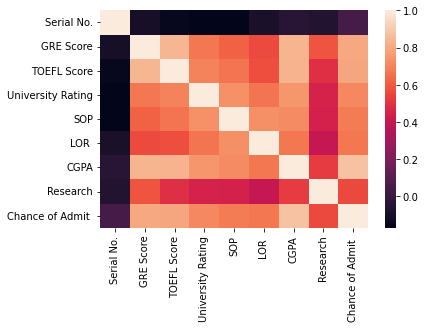

In [14]:
# Using heatmap to show the correlation among the parameters of the data
admission.corr()
sns.heatmap(admission.corr(),linecolor='green')

We can see that the 'Research' parameter is highly correlated with other parameters

Now we will visualize each features in the <b>admission</b> dataframe

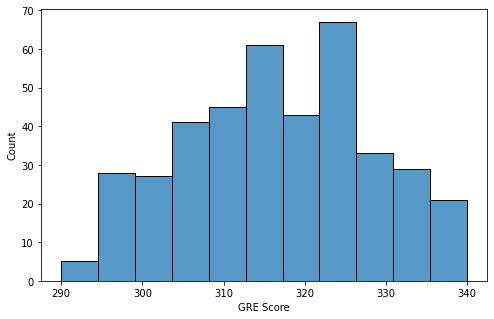

In [15]:
#Using histplot to show the distribution of GRE Score
plt.figure(figsize=(8,5))
sns.histplot(x="GRE Score", data=admission)
plt.show()

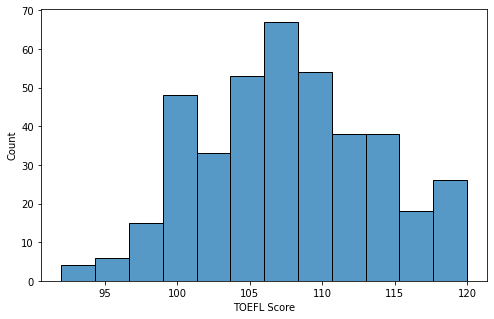

In [16]:
#Using histplot to show the distribution of TOEFL Score
plt.figure(figsize=(8,5))
sns.histplot(x="TOEFL Score", data=admission)
plt.show()

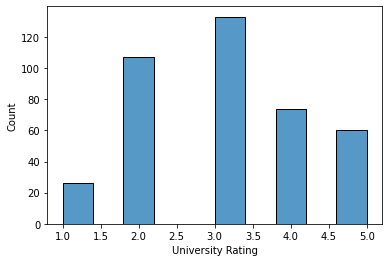

In [24]:
#Using histplot to show the distribution of University Rating
sns.histplot(x="University Rating", data=admission)
plt.show()

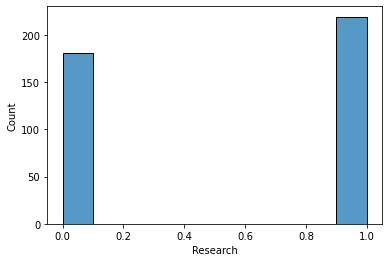

In [25]:
#Using histplot to show the distribution of Research
sns.histplot(x="Research", data=admission)
plt.show()

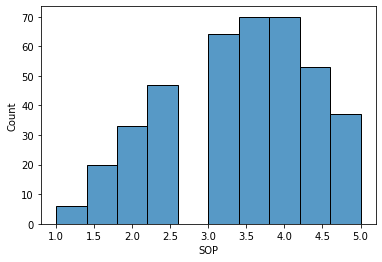

In [26]:
#Using histplot to show the distribution of SOP
sns.histplot(x="SOP", data=admission)
plt.show()

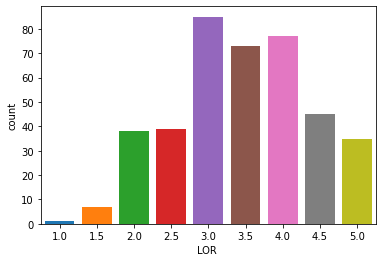

In [23]:
#Using Countplot to show the distribution of LOR 
sns.countplot(x=admission['LOR '],saturation=2)
plt.show()

# Predictive Analysis

As we know that our target feature is the <b>Chance of Admit</b> so, we will select that

In [28]:
from sklearn.model_selection import train_test_split
X2=admission.drop(['Chance of Admit '],axis=1)
y2=admission['Chance of Admit ']

#train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

### Using Linear regression

In [36]:
# Using linear regression object
LR2 = LinearRegression()
# fitting the model
LR2.fit(X_train2,y_train2)

y_pred2 = LR2.predict(X_test2)
y_pred2

array([0.6854095 , 0.71581608, 0.79926038, 0.61805808, 0.7242629 ,
       0.57736493, 0.70107968, 0.64873885, 0.87154637, 0.92432719,
       0.51025494, 0.87246855, 0.70062709, 0.47765461, 0.82436534,
       0.59690244, 0.64152801, 0.80691037, 0.5820035 , 0.73299054,
       0.87992147, 0.85549425, 0.64660036, 0.4719328 , 0.78647009,
       0.60114865, 0.48027319, 0.6147603 , 0.90536651, 0.63902726,
       0.62810949, 0.7537993 , 0.76791573, 0.55899743, 0.76175611,
       0.75139287, 0.6374612 , 0.85934991, 0.62422997, 0.96713477,
       0.70998559, 0.68584059, 0.67693462, 0.77295903, 0.84979107,
       0.63090875, 0.58517828, 0.70660331, 0.59940471, 0.60054017,
       0.67649725, 0.79172354, 0.65985516, 0.87554306, 0.73649531,
       0.77076998, 0.6902838 , 0.70042381, 0.73363763, 0.81036261,
       0.74639873, 0.47801858, 0.59846221, 0.54303989, 0.83748683,
       0.8471193 , 0.72731878, 0.84258435, 0.75562999, 0.76342208,
       0.56494007, 0.84017233, 0.80626106, 0.58357043, 0.91415

### Using Decision Tree regression

In [37]:
from sklearn.tree import DecisionTreeRegressor 
DTR = DecisionTreeRegressor() 
# fit the model
DTR.fit(X_train2,y_train2)
# predict the values for test data
y_pred3 = DTR.predict(X_test2)
y_pred3

array([0.68, 0.64, 0.8 , 0.67, 0.71, 0.47, 0.78, 0.74, 0.93, 0.91, 0.52,
       0.91, 0.45, 0.36, 0.85, 0.49, 0.74, 0.83, 0.68, 0.73, 0.89, 0.86,
       0.59, 0.47, 0.87, 0.65, 0.34, 0.66, 0.87, 0.64, 0.66, 0.69, 0.85,
       0.65, 0.84, 0.72, 0.65, 0.85, 0.78, 0.94, 0.69, 0.69, 0.8 , 0.84,
       0.85, 0.46, 0.7 , 0.78, 0.71, 0.71, 0.67, 0.84, 0.71, 0.85, 0.81,
       0.7 , 0.46, 0.8 , 0.76, 0.82, 0.84, 0.47, 0.66, 0.64, 0.82, 0.85,
       0.78, 0.94, 0.84, 0.73, 0.72, 0.84, 0.92, 0.62, 0.91, 0.66, 0.62,
       0.72, 0.9 , 0.51, 0.71, 0.45, 0.54, 0.89, 0.62, 0.76, 0.59, 0.65,
       0.79, 0.78, 0.67, 0.94, 0.54, 0.58, 0.81, 0.67, 0.74, 0.72, 0.66,
       0.82, 0.71, 0.57, 0.66, 0.59, 0.78, 0.71, 0.94, 0.66, 0.78, 0.7 ,
       0.65, 0.72, 0.81, 0.76, 0.83, 0.92, 0.91, 0.72, 0.67, 0.64])

After that, we test the model on the test data.

In [38]:
#linear regression
MSE2 = mean_squared_error(y_true = y_test2, y_pred = y_pred2)
print('The MSE value: ', MSE2)

The MSE value:  0.004017564471719363


In [39]:
#decision tree regression
MSE2 = mean_squared_error(y_true = y_test2, y_pred = y_pred2)
print('The MSE value: ', MSE2)

The MSE value:  0.004017564471719363


Now we will be checking the accuracy score for linear regression:

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
# predicting the accuracy score
score2 = r2_score(y_test2,y_pred2)
print('The R_squared value: ',score2)

Now we will be checking the accuracy score for decision tree regression:

In [40]:
# importing r2_score module
from sklearn.metrics import r2_score
# predicting the accuracy score
score3 = r2_score(y_test2,y_pred3)
print('The R_squared value: ',score3)

The R_squared value:  0.5268813559732382


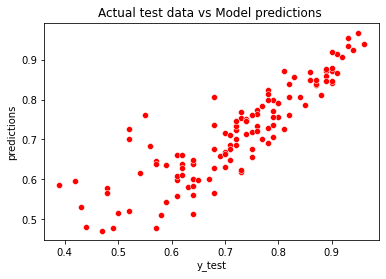

In [41]:
#graph representation for linear regression
sns.scatterplot(x=y_test2, y=y_pred2,color='red');
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

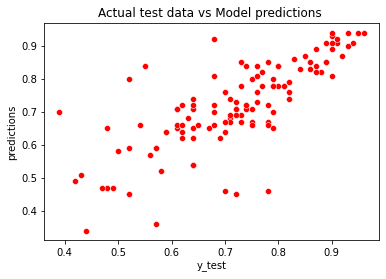

In [42]:
#graph representation for decision tree regression
sns.scatterplot(x=y_test2, y=y_pred3, color='red');
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

In [43]:
#predicted value using linear regression
pred_df = pd.DataFrame({'Actual Value':y_test2,'Predicted Value':y_pred2,
                      'Difference':y_test2 - y_pred2})
pred_df

Actual Value  Predicted Value  Difference
132          0.71         0.685410    0.024590
309          0.70         0.715816   -0.015816
341          0.79         0.799260   -0.009260
196          0.73         0.618058    0.111942
246          0.72         0.724263   -0.004263
..            ...              ...         ...
216          0.91         0.865509    0.044491
259          0.90         0.918591   -0.018591
49           0.78         0.729447    0.050553
238          0.70         0.664774    0.035226
343          0.59         0.635346   -0.045346

[120 rows x 3 columns]

In [44]:
#predicted value using decision tree regression
pred_df2 = pd.DataFrame({'Actual Value':y_test2,'Predicted Value':y_pred3,
                      'Difference':y_test2 - y_pred3})
pred_df2

Actual Value  Predicted Value  Difference
132          0.71             0.68        0.03
309          0.70             0.64        0.06
341          0.79             0.80       -0.01
196          0.73             0.67        0.06
246          0.72             0.71        0.01
..            ...              ...         ...
216          0.91             0.92       -0.01
259          0.90             0.91       -0.01
49           0.78             0.72        0.06
238          0.70             0.67        0.03
343          0.59             0.64       -0.05

[120 rows x 3 columns]

### Result:
Here, I have used two algorithms to train the model: linear and decision tree regression.
The MSE value using linear regression is less than the MSE value using decision tree regression. So, we know that the lowest error gives a better accuracy score; therefore, the MSE value using linear regression gives more accuracy.
I have created a new dataframe called pred_df for linear regression and pred_df2 for decision tree regression to get clear information about the predicted value for the algorithms, and I can conclude that the prediction value using linear regression gives more accuracy than the decision tree regression.

<b>3 
Using the seaborn inbuilt dataset tips. Check whether theres a significant difference in tip given by
’male’ and ’female’ at 95% confidence level.<b>


In [ ]:
import seaborn as sb
tip = sb.load_dataset('tips')
tip.head(10)

Checking for a significant difference between male and female for giving tips

In [ ]:
#Using groupby method
tip.groupby(['sex', 'tip']).mean()

In [ ]:
#Visualize the data (for all type)
sns.catplot(data = tip, x = 'sex', y = 'tip', kind = 'box')
plt.show()

In [ ]:
#Lets filter out only having the 1 tip
tip[tip['tip'] >= 1]['tip']

In [ ]:
#Lets perform ANOVA test
male =  tip[(tip['tip'] >= 1) & (tip['sex'] == 'Male')]['tip']
female =  tip[(tip['tip'] >= 1) & (tip['sex'] == 'Female')]['tip']

In [ ]:
#F oneway test
import scipy.stats as stats
stats.f_oneway(male, female)

In [ ]:
#Using statsmodels
import statsmodels.stats.oneway as oneway
oneway.anova_oneway((male, female), use_var = 'equal')

### Result
Therefore, with 20% confidence level there is no significant difference between the male and female for giving tips